<a href="https://colab.research.google.com/github/Sriveni-bonam/Data-Science/blob/main/Directing_customers_to_subscription_through_financial_app_behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [2]:
dataset = pd.read_csv('appdata10.csv')

In [3]:
dataset.head(10)
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
dataset["hour"] = dataset.hour.str.slice(1, 3).astype(int)

In [5]:
dataset2 = dataset.copy().drop(columns = ['user', 'screen_list', 'enrolled_date',
                                           'first_open', 'enrolled'])
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


In [6]:
dataset['hour']

,hour
0,2
1,1
2,19
3,16
4,18
...,...
49995,13
49996,0
49997,22
49998,12


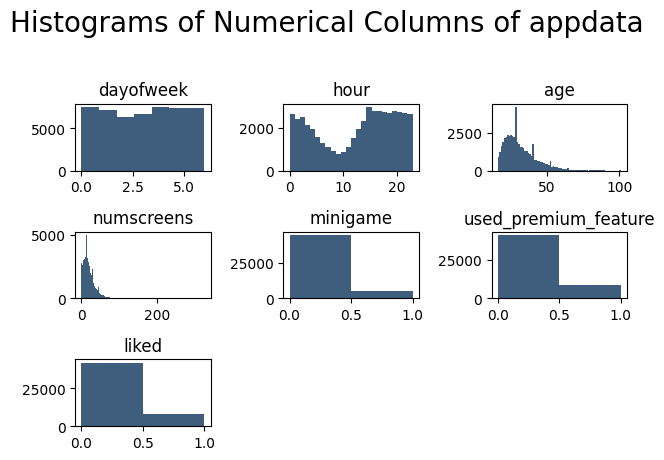

In [7]:
plt.suptitle('Histograms of Numerical Columns of appdata', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(3, 3, i)
    f = plt.gca()
#    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])

    vals = np.size(dataset2.iloc[:, i - 1].unique())

    plt.hist(dataset2.iloc[:, i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

<Axes: title={'center': 'Correlation with Reposnse variable'}>

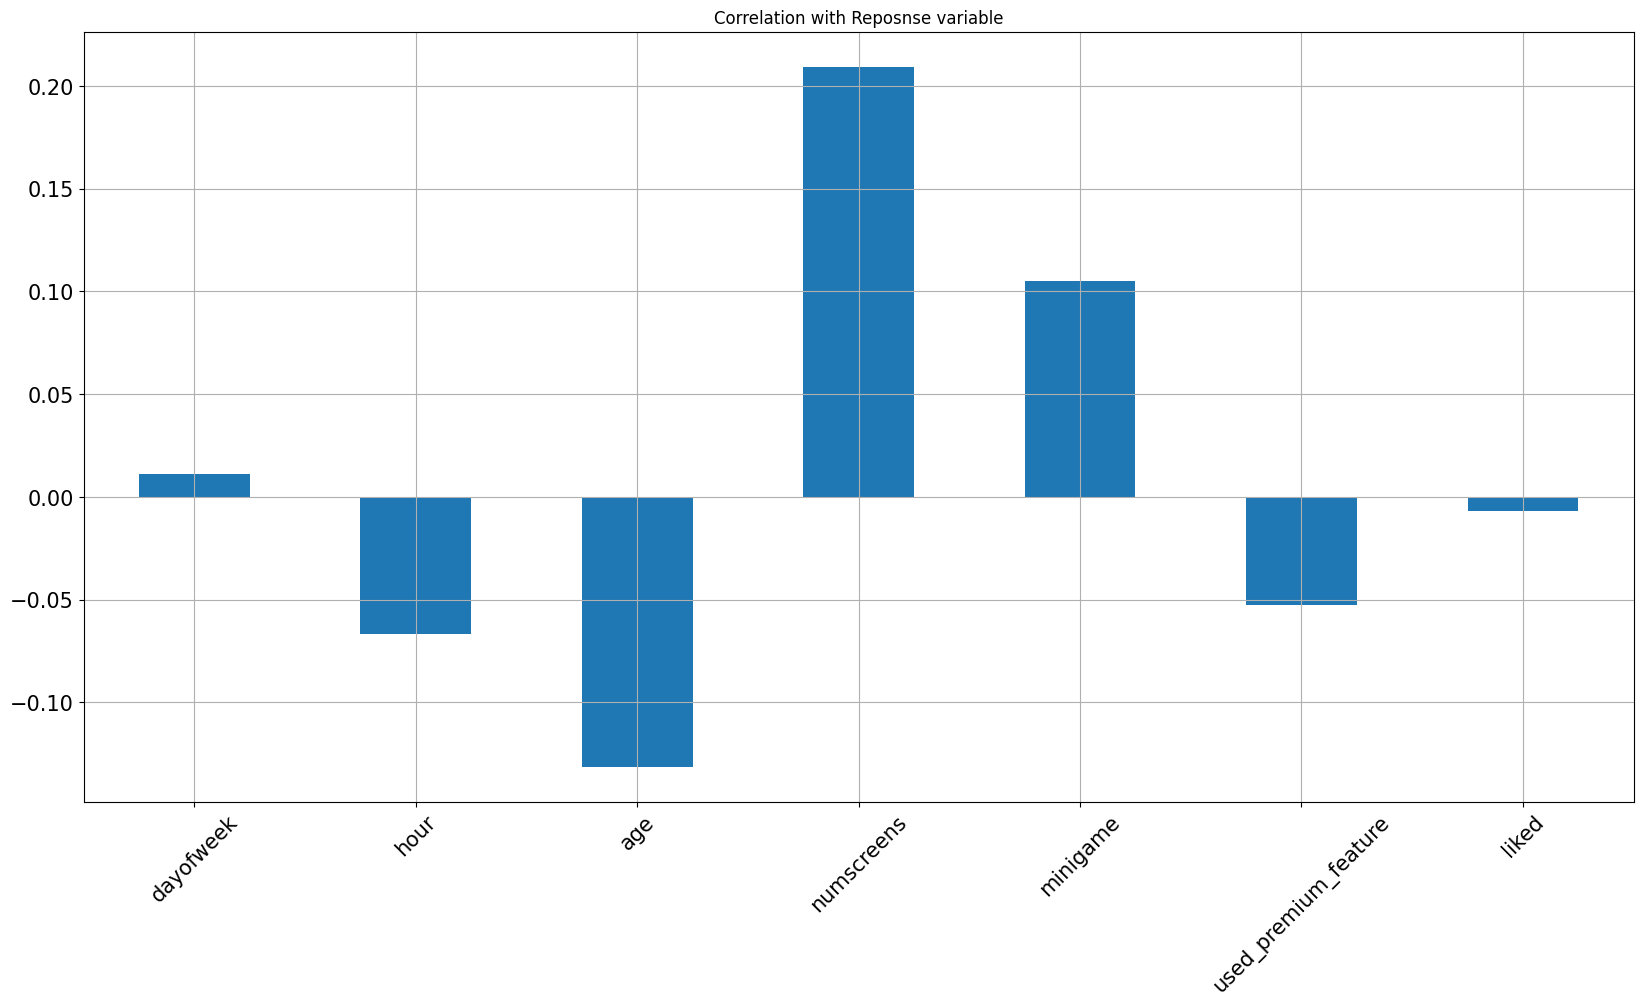

In [8]:
dataset2.corrwith(dataset.enrolled).plot.bar(figsize=(20,10),
                  title = 'Correlation with Reposnse variable',
                  fontsize = 15, rot=45,
                  grid = True)

<Axes: >

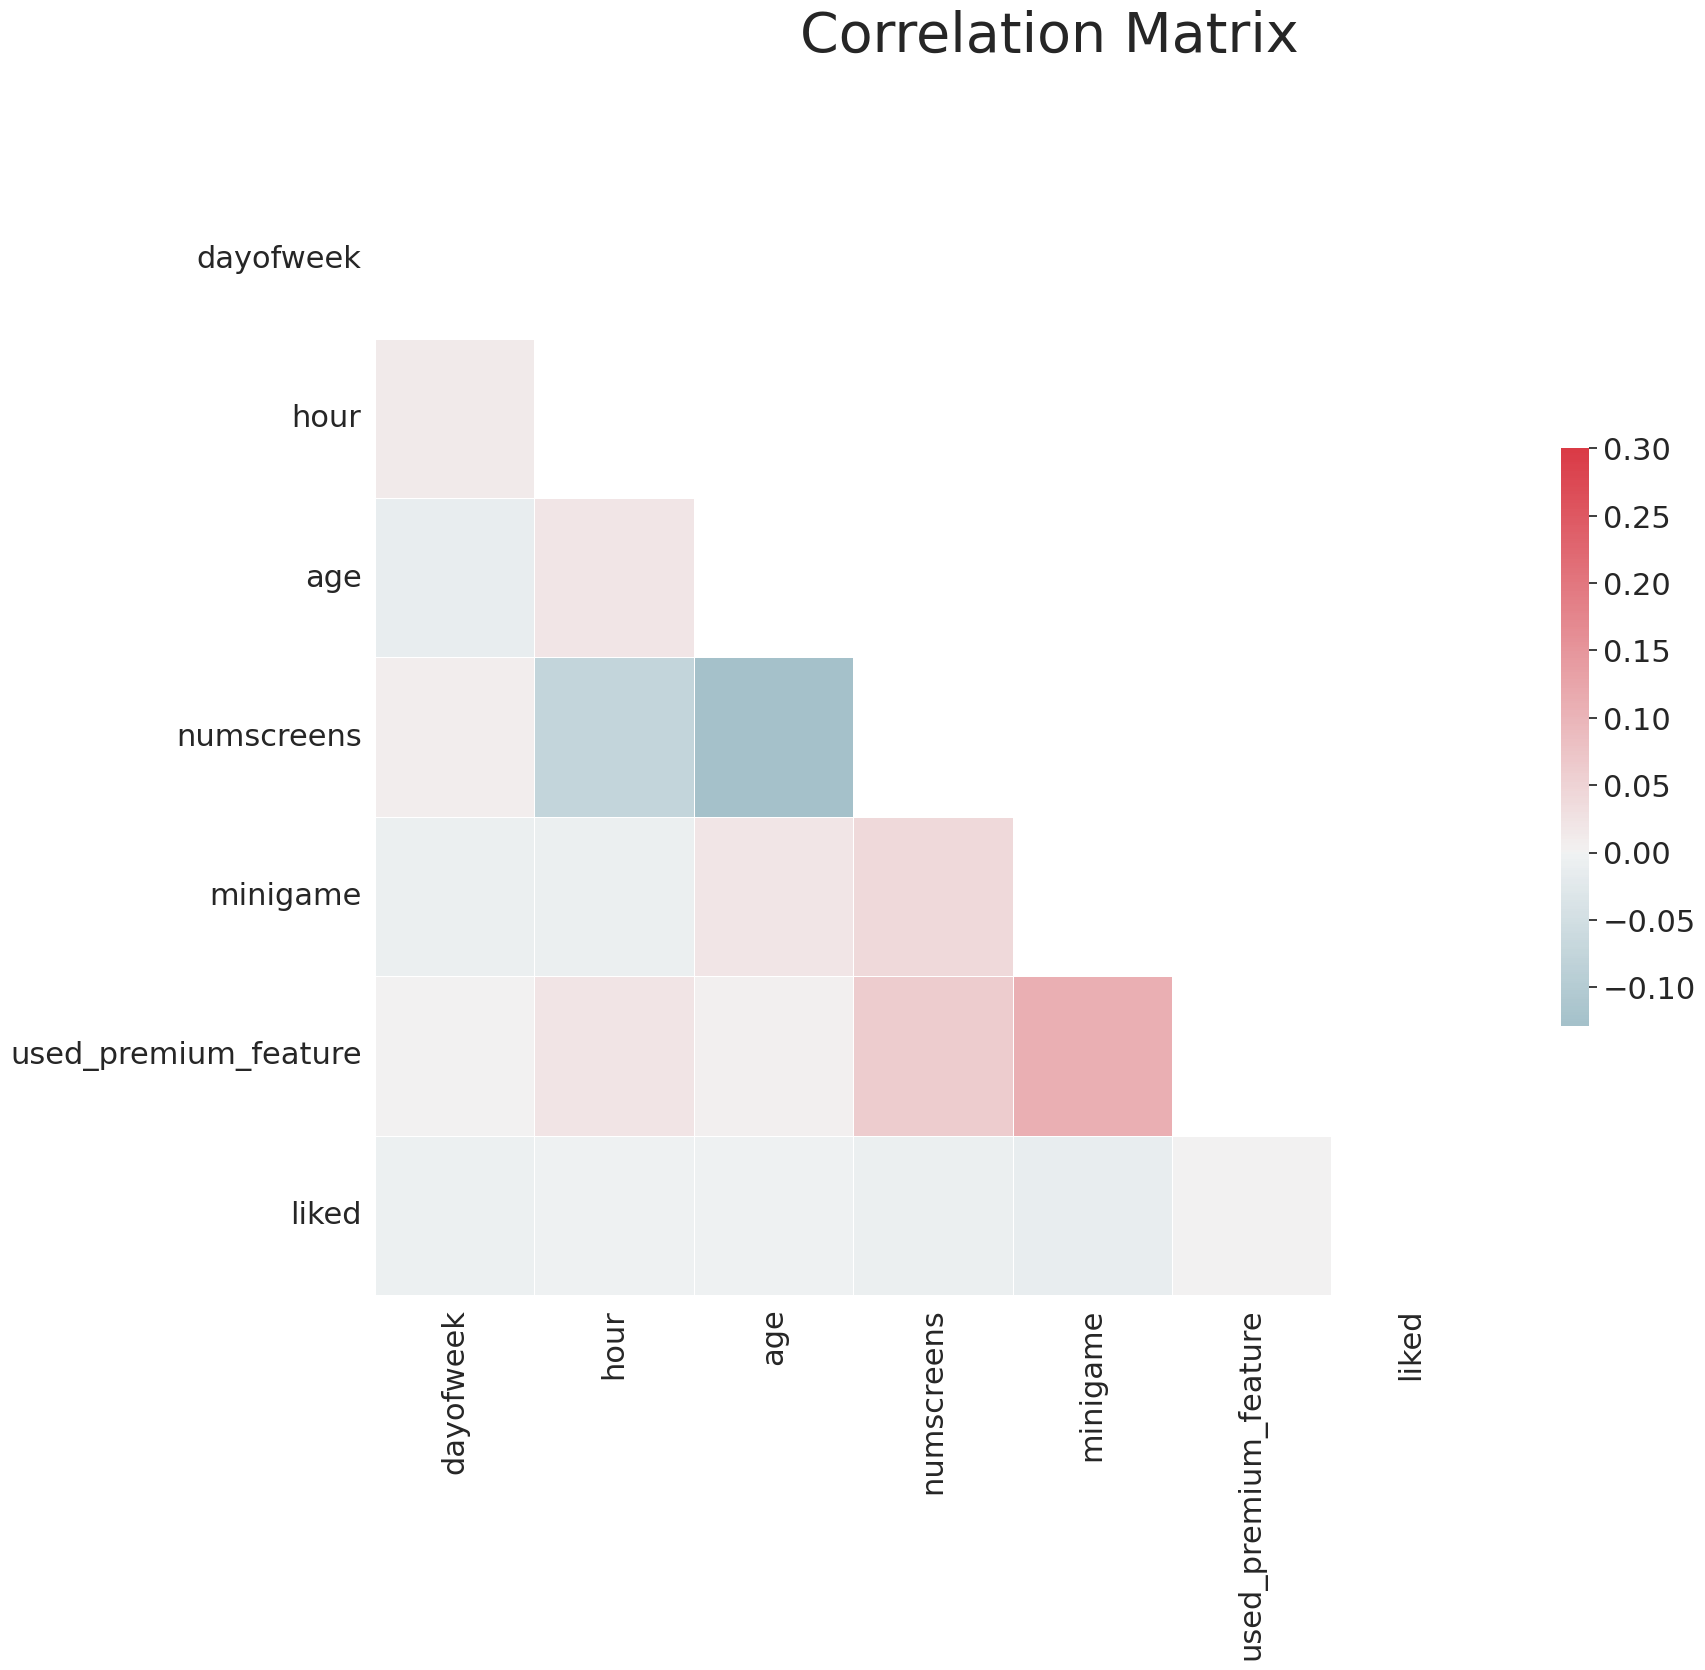

In [9]:
## Correlation Matrix
sn.set(style="white", font_scale=2)

# Compute the correlation matrix
corr = dataset2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))
f.suptitle("Correlation Matrix", fontsize = 40)

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [10]:
#### Feature Engineering ####
dataset.dtypes

,0
user,int64
first_open,object
dayofweek,int64
hour,int64
age,int64
screen_list,object
numscreens,int64
minigame,int64
used_premium_feature,int64
enrolled,int64


In [11]:
dataset["first_open"] = [parser.parse(row_data) for row_data in dataset["first_open"]]

In [12]:
dataset["enrolled_date"] = [parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in dataset["enrolled_date"]]

In [13]:
dataset.dtypes

,0
user,int64
first_open,datetime64[ns]
dayofweek,int64
hour,int64
age,int64
screen_list,object
numscreens,int64
minigame,int64
used_premium_feature,int64
enrolled,int64


In [14]:
# Selecting Time For Response
dataset["difference"] = (dataset.enrolled_date - dataset.first_open).astype('timedelta64[s]')
dataset["difference"] = dataset["difference"]/pd.Timedelta(hours=1)

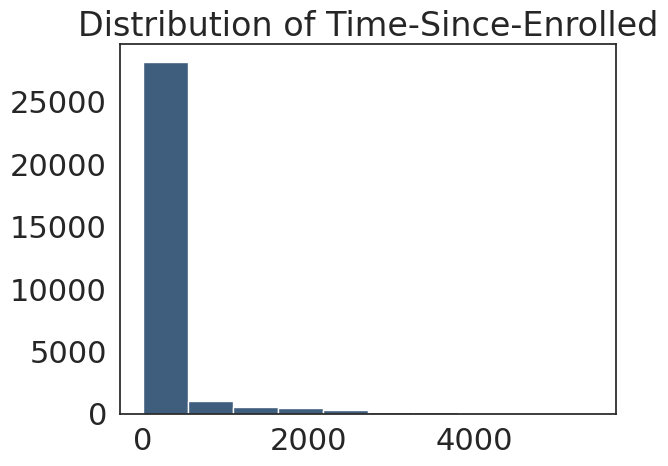

In [15]:
plt.hist(dataset["difference"].dropna(), color='#3F5D7D')
plt.title('Distribution of Time-Since-Enrolled')
plt.show()

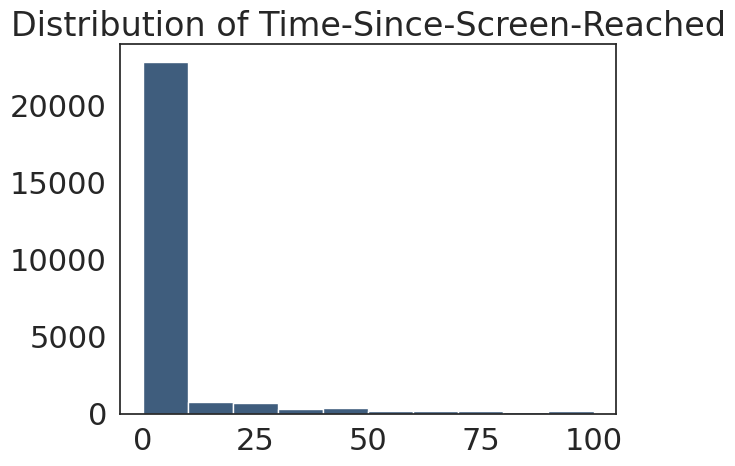

In [16]:
plt.hist(dataset["difference"].dropna(), color='#3F5D7D', range = [0, 100])
plt.title('Distribution of Time-Since-Screen-Reached')
plt.show()

In [17]:
dataset.loc[dataset.difference > 48, 'enrolled'] = 0
dataset = dataset.drop(columns=['enrolled_date', 'difference', 'first_open'])

In [18]:
## Formatting the screen_list Field

# Load Top Screens
top_screens = pd.read_csv('top_screens.csv').top_screens.values
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [19]:
# Mapping Screens to Fields
dataset["screen_list"] = dataset.screen_list.astype(str) + ','

In [20]:
for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset['screen_list'] = dataset.screen_list.str.replace(sc+",", "")

In [21]:
dataset['Other'] = dataset.screen_list.str.count(",")
dataset = dataset.drop(columns=['screen_list'])


In [22]:
# Funnels
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
dataset["SavingCount"] = dataset[savings_screens].sum(axis=1)

In [23]:
dataset = dataset.drop(columns=savings_screens)

In [24]:
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
dataset["CMCount"] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns=cm_screens)

In [25]:
cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
dataset["CCCount"] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)

In [26]:
loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)

In [27]:
dataset=dataset.drop(columns='SavingCount')

In [28]:
dataset.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,CMCount,CCCount,LoansCount
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.495760,0.165000,0.517760,...,0.096560,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499987,0.371184,0.499689,...,0.295361,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,5.00000,3.000000,3.000000


In [29]:
dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Other', 'CMCount',
       'CCCount', 'LoansCount'],
      dtype='object')

In [31]:
dataset= pd.read_csv("newappdata10.csv")

In [32]:
response=dataset["enrolled"]

In [33]:
dataset=dataset.drop(columns="enrolled")

In [34]:
import sys
print(sys.executable)

/usr/bin/python3


In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(dataset, response, test_size= 0.2, random_state=0)

In [36]:
train_identifier= x_train["user"]
x_train= x_train.drop(columns= 'user')

In [37]:
test_identifier= x_test["user"]
x_test= x_test.drop(columns= "user")

In [38]:
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
x_train2= pd.DataFrame(sc_X.fit_transform(x_train))
x_test2= pd.DataFrame(sc_X.transform(x_test))

In [39]:
x_train2.columns= x_train.columns.values
x_test2.columns= x_test.columns.values
x_train2.index= x_train.index.values
x_test2.index= x_test.index.values
x_train= x_train2
x_test= x_test2

In [40]:
#model Building

In [41]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0, penalty='l1', solver='liblinear')
classifier.fit(x_train, y_train)

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [42]:
y_pred= classifier.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm=confusion_matrix(y_test, y_pred)

In [43]:
print("Confusion Matrix:\n",cm)
print("Accuracy Score:",accuracy_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall_score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Confusion Matrix:
 [[3903 1183]
 [1126 3788]]
Accuracy Score: 0.7691
Precision Score: 0.7620197143431905
Recall_score: 0.7708587708587709
F1 Score: 0.7664137582195245


Test Data Accuracy: 0.7691


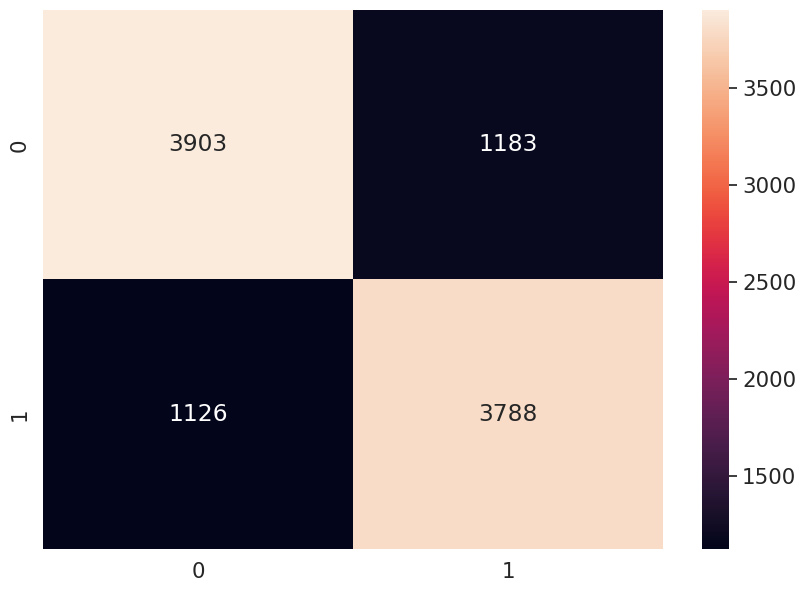

In [44]:
df_cm= pd.DataFrame(cm, index= (0, 1), columns= (0, 1))
plt.figure(figsize=(10,7))
sn.set(font_scale= 1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [45]:
from sklearn.model_selection import cross_val_score
accuracies= cross_val_score(estimator= classifier, X= x_train, y=y_train, cv=10)

In [46]:
print("Logistic Accuracy: %0.3f (+/- %0.3f)"%(accuracies.mean(), accuracies.std()*2 ))

Logistic Accuracy: 0.768 (+/- 0.009)


In [47]:
# Formatting the final results

In [48]:
final_results= pd.concat([y_test, test_identifier], axis=1).dropna()
final_results['predicted_results']= y_pred
final_results[['user', 'enrolled', 'predicted_results']].reset_index(drop=True)

,user,enrolled,predicted_results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
...,...,...,...
9995,143036,1,0
9996,91158,1,1
9997,248318,0,0
9998,142418,1,1


In [49]:
fr=pd.DataFrame(final_results)
fr

,enrolled,user,predicted_results
11841,1,239786,1
19602,1,279644,1
45519,0,98290,0
25747,1,170150,1
42642,1,237568,1
...,...,...,...
25091,1,143036,0
27853,1,91158,1
47278,0,248318,0
37020,1,142418,1
